Preprocess 7: Lens Light Centre (Optional)
==========================================

In this tool we mark the lens light centre(s) of a strong lens(es), which can be used as fixed values for the lens
light and mass models in a pipeline.

The benefit of doing this is a reduction in the number of free parameters fitted for as well as the removal of
systematic solutions which place the lens mass model unrealistically far from its true centre. The `advanced` pipelines
are built to use this input centres in early phases, but remove it in later phases one an accurate lens model has
been inffered.

If you create a light_centre for your dataset, you must also update your runner to use them by loading them and
passing them to the pipeline`s make function. See the `advanced` pipelines for pipelines with these centre inputs.

Lens light centres are optional, if you struggling to get PyAutoLens to infer a good model for your dataset and you
have not tried using the lens light centres as a fixed centre for your mass model I recommend that you do.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

#%matplotlib inline
from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


The path where the lens light centre is output, which is `dataset/imaging/no_lens_light/mass_sie__source_sersic`.

In [2]:
dataset_type = "imaging"
dataset_label = "with_lens_light"
dataset_name = "light_sersic__mass_sie__source_sersic"
dataset_path = path.join("dataset", dataset_type, dataset_label, dataset_name)

If you use this tool for your own dataset, you *must* double check this pixel scale is correct!

In [3]:
pixel_scales = 0.1

First, load the `Imaging` dataset, so that the lens light centres can be plotted over the strong lens image.

In [4]:
image = al.Array2D.from_fits(
    file_path=path.join(dataset_path, "image.fits"), pixel_scales=pixel_scales
)

Now, create a lens light centre, which is a Coordinate object of (y,x) values.

In [5]:
light_centre = al.Grid2DIrregular(grid=[(0.0, 0.0)])

Now lets plot the image and lens light centre, so we can check that the centre overlaps the lens light.

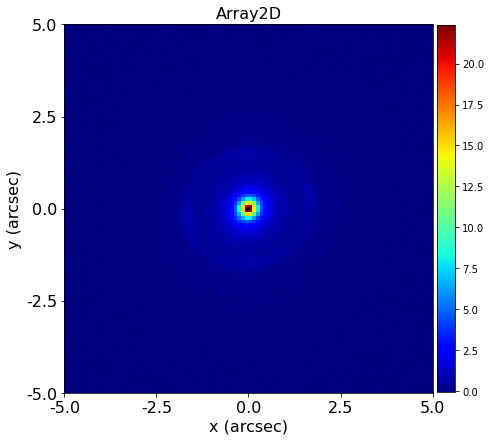

In [6]:
mat_plot_2d = aplt.MatPlot2D()
visuals_2d = aplt.Visuals2D(light_profile_centres=light_centre)

array_plotter = aplt.Array2DPlotter(
    array=image, visuals_2d=visuals_2d, mat_plot_2d=mat_plot_2d
)
array_plotter.figure()

Now we`re happy with the lens light centre(s), lets output them to the dataset folder of the lens, so that we can 
load them from a .json file in our pipelines!

In [7]:
light_centre.output_to_json(
    file_path=path.join(dataset_path, "light_centre.json"), overwrite=True
)

The workspace also includes a GUI for drawing lens light centres, which can be found at 
`autolens_workspace/notebooks/preprocess/imaging/gui/light_centres.py`. This tools allows you `click` on the image where an 
image of the lensed source is, and it will use the brightest pixel within a 5x5 box of pixels to select the coordinate.